<center>
    <img src="https://cloud.ias.u-psud.fr/index.php/apps/files_sharing/publicpreview/gjP7kfGF5AmdA4J?x=2560&y=873&a=true&file=code_club_logo.png&scalingup=0"/ width="400"> <img src="https://www.software.ac.uk/sites/default/files/images/content/jupyter-main-logo.svg"/ width="700">
</center>

# <center> Introduction to Jupyter notebooks and Jupyter Lab </center>

**Date:** May 12th, 2022  
**Author:** Loïc Maurin ([loic.maurin@universite-paris-saclay.fr](mailto:loic.maurin@universite-paris-saclay.fr))

## Context

> Project Jupyter is a non-profit, open-source project, born out of the IPython Project in 2014 as it evolved to support interactive data science and scientific computing across all programming languages. Jupyter will always be 100% open-source software, free for all to use and released under the liberal terms of the modified BSD license.

**[Jupyter website](https://jupyter.org/)**  
**[Jupyter documentation](https://docs.jupyter.org/en/latest/)**  
**[Jupyter Github](https://github.com/jupyter/jupyter)**  

Jupyter is a large project with many tools. In this introduction, we will focus on Jupyter notebooks and Jupyter Lab. **Jupyter** stands for **Ju**lia, **Pyt**hon and **R**. In our case, we are mostly interested in Python functionnalities, but the framework is common for the three languages (actually other languages are also included now).
Historically, Jupyter notebooks could be seen as an extension to the **IPython** functionalities and usage. Later on, an interface around Jupyter notebooks was developped to provide some IDE like functionalities, this is Jupyter Lab. Jupyter Lab is now the recommended tool to work on your Jupyter notebooks.

## Sources

Many great tutorials about Jupyter notebooks already exists. We will use some of them. Others are listed if you want to explore them.

* [**Introduction to Jupyter and JupyterLab** by CodeRefinery](https://coderefinery.github.io/jupyter/)  
* [**Gallery of notebooks** on Jupyter Github](https://github.com/jupyter/jupyter/wiki)
* [A Beginner’s Tutorial to Jupyter Notebooks](https://towardsdatascience.com/a-beginners-tutorial-to-jupyter-notebooks-1b2f8705888a)
* [How to Use Jupyter Notebook in 2020: A Beginner’s Tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)
* [Cheatsheet (keyboard shortcuts)](https://cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/)

## Use cases

From the [Code Refinery tutorial](https://coderefinery.github.io/jupyter/motivation/).

In [1]:
from IPython.display import IFrame
IFrame(src="https://coderefinery.github.io/jupyter/motivation/", width='100%', height='700px')

* [Gravitational waves](https://github.com/losc-tutorial/quickview/blob/master/index.ipynb): a quick look at short segments of data from the Gravitational Wave Open Science Center.
* [Activity Inequality Project](https://github.com/timalthoff/activityinequality): notebooks to reproduce plots from the paper.

**What is it good at?**
* Quick linear analysis: read data, do some processing, make some plots.
* Testing libraries.
* Sharing and explaining your analysis (mixing code, text and images).
* Teaching.
* Provide codes to reproduce your papers plots.

**What is it not meant to do?**
* Develop long programs or complex codes.


*[WARNING] A notebook is not a library, it is a very convenient tool but it will not replace your code editor!*

## How to install and use it?

Jupyter tools can be installed with your favorite Python package installer, like **pip** or **conda**. As always in the **Code Club**, we recommend to do it inside a virtual environnement:
* Create a directory for this tutorial and move into it.
* If you prefer **virtualenv + pip**:
  * `python -m venv .venv`
  * `source .venv/bin/activate`
  * `pip install jupyter-lab`
* If you prefer **conda**:
  * `conda create -n Jupyter`
  * `conda activate Jupyter`
  * `conda install jupyterlab`
  
Then just run `jupyter-lab` command in your terminal, your browser should open (maybe you need to click on the link in the terminal) and you will reach the Jupyter Lab interface.

## First notebook: calculating pi using Monte Carlo methods

From the [Code Refinery tutorial](https://coderefinery.github.io/jupyter/first-notebook/).

In [2]:
from IPython.display import IFrame
IFrame(src="https://coderefinery.github.io/jupyter/first-notebook/", width='100%', height='500px')

### Relevant formulas

- square area: $s = (2 r)^2$
- circle area: $c = \pi r^2$
- $c/s = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * c/s$

### Image to visualize the concept
![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

In [3]:
# importing modules that we will need
!pip install numpy matplotlib

import random
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# initializing the number of "throws"

num_points = 1000

In [5]:
# here we "throw darts" and count the number of hits

points = []
hits = 0
for _ in range(num_points):
    x, y = random.random(), random.random()
    if x*x + y*y < 1.0:
        hits += 1
        points.append((x, y, "red"))
    else:
        points.append((x, y, "blue"))

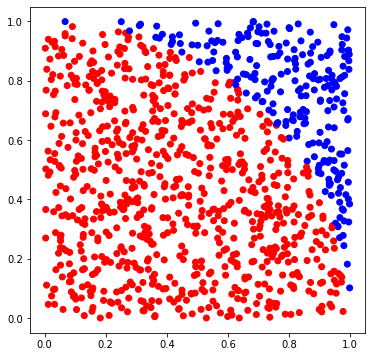

In [6]:
# unzip points into 3 lists
x, y, colors = zip(*points)

# define figure dimensions
fig, ax = plt.subplots()
fig.set_size_inches(6.0, 6.0)

# plot results
ax.scatter(x, y, c=colors)

In [7]:
# compute and print the estimate

fraction = hits / num_points
4 * fraction

3.068

## Ipywidgets: interactive plots

In [8]:
IFrame(src="https://ipywidgets.readthedocs.io/en/stable/", width='100%', height='500px')

### `interact` function

You can interact with your code with the `interact` function from `ipywidgets`. Let's have a first look at it.

In [9]:
!pip install ipywidgets
from ipywidgets import interact

In [10]:
def f(x):
    print(x)

In [11]:
interact(f, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

In [12]:
interact(f, x=False)

interactive(children=(Checkbox(value=False, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [13]:
interact(f, x="Hello!")

interactive(children=(Text(value='Hello!', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [14]:
interact(f, x=range(10))

interactive(children=(Dropdown(description='x', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), value=0), Output()), _…

<function __main__.f(x)>

### `interact` as a decorator

Maybe a better way to use `interact` is to use it as a **decorator**.  
(You might have seen a thing with an @ before the definition of a function. This is called a decorator.).

In [15]:
@interact
def f(x=10):
    print(x)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [16]:
@interact
def f(x=(0,10,0.1)):
    print(x)

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0), Output()), _dom_classes=('widget-inte…

In [17]:
@interact
def f(x=range(10)):
    print(x)

interactive(children=(Dropdown(description='x', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), value=0), Output()), _…

### Example for plots

How should you use it in your notebooks? A very good way to use it is to vary parameters in your plots:

In [18]:
def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)

@interact
def plot_gaussian(a=(0,10,0.1), b=(1,10,0.1), c=(-5,5,0.1)):
    x = np.linspace(-10, 10, 10000)
    plt.plot(x, gaussian(x, a, b, c))
    plt.ylim(0,10)

interactive(children=(FloatSlider(value=5.0, description='a', max=10.0), FloatSlider(value=5.0, description='b…

You could use it to visually inspect the fit of a model to you data. For example, let's create a noisy gaussian and try to fit it with a polynomial. We will vary the order of the polynomial.

In [19]:
def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y

def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit

def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()

In [20]:
x, y = noisy_gaussian()

@interact
def slider(n=(3, 30)):
    yfit = fit(x, y, n)
    plot(x, y, yfit)

interactive(children=(IntSlider(value=16, description='n', max=30, min=3), Output()), _dom_classes=('widget-in…

Or maybe we want to have the possibility to modify the colorbar of an image to inspect the full dynamic range.

In [21]:
data = np.random.randn(100).reshape(10,10)

@interact
def slider(vmin=(-10,0), vmax=(0,10)):
    plt.imshow(data, vmin=vmin, vmax=vmax)
    plt.colorbar()

interactive(children=(IntSlider(value=-5, description='vmin', max=0, min=-10), IntSlider(value=5, description=…

### Widgets

If you want to add more complex behaviours, a large variety of widgets is available for that. To use them, you need to create a widget object that will hold a value that you can set interactively, and then recover its value. Let's see an example:

In [22]:
from ipywidgets import IntSlider

int_slider = IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    orientation='horizontal',
)

In [23]:
int_slider

IntSlider(value=7, description='Test:', max=10)

In [24]:
print(int_slider.value)

7


For example, you might want to change the color of your plot:

In [25]:
from ipywidgets import ColorPicker

color_picker = ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

In [26]:
color_picker

ColorPicker(value='blue', description='Pick a color')

In [27]:
plt.plot(np.random.randn(100), color=color_picker.value)

Or select a date from a calendar:

In [28]:
from ipywidgets import DatePicker

date_picker = DatePicker(
    description='Pick a Date',
    disabled=False
)

In [31]:
date_picker

DatePicker(value=datetime.date(2022, 5, 25), description='Pick a Date')

In [32]:
print(date_picker.value)
print(date_picker.value.strftime("%d %b, %Y"))

2022-05-25
25 May, 2022


A complete list of available widgets is available [here](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html).

In [33]:
IFrame(src="https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html", width='100%', height='500px')

## How to show your notebook?

One goal of a notebook is to let you present your work in a nice and clear format. The good thing about a notebook is that you don't necessarily need to execute the code all the time. Once your notebook is ready, you can share it or show it with all the computation done and look at the plots and texts. There are several ways to render a notebook without starting a Jupyter Lab instance. It means that the person you want to show your results to will not need to have a Python installatio at all to look at your work.

### `nbconvert`

`nbconvert` is a command line tool that allows you to convert a Jupyter notebooks to many other formats, like html, pdf, latex, asciidoc, markdown or python.

For example, try `jupyter-nbconvert Introduction\ to\ Jupyter\ Lab.ipynb --to html` and open the result in your browser.

### Gitlab, Github

Gitlab and Github render the Jupyter notebooks directly. So if you store your notebooks in the IAS Gitlab (and you should), sharing them is very easy.

### Nbviewer

Nbviewer lets you render any Github/Gitlab hosted notebook. Just type the URL of the notebook and it will display it.

In [34]:
IFrame(src="https://nbviewer.org/", width='100%', height='500px')

## What if I don't have a Python installation on my computer?

There are several options to run a Jupyter notebook remotely.

### Binder

[Binder](https://mybinder.org/) lets you run a Jupyter Lab instance remotely from any Github/Gitlab public project. Just type the name of your project and it will open a Jupyter Lab instance. Even better, if you project has an environement file (`requirements.txt` or `environment.yml`), it will automatically create the environment from it, so all your libraries will be available. The only problem with Binder is that it can get saturated sometimes or very slow.

In [35]:
IFrame(src="https://mybinder.org/", width='100%', height='700px')

### Jupyter Hub Paris Saclay

A Jupyter Hub is hosted at IJC Lab and accessible to all University members: [JupyterHub@Paris-Saclay](https://jupyterhub.ijclab.in2p3.fr/). A JupyterHub lets you leaunch JupyterLab instances and gives you some space to store your notebooks.

### IAS machines

If you have access to an interactive IAS machine, you can install and run a Jupyter Lab instance there. You will thus have access to all your data on the cluster and the more computing power. It is slightly more complicated than running it on your local computer since you will need to access it remotely. Once you have installed jupyterlab in you default environment (otherwise, you need to source the desired environment before launching jupyterlab), you can user the following command:
```
ssh <remote-server> 'jupyter-lab --no-browser --ip=0.0.0.0 --notebook-dir=</path/to/your/notebooks> --ServerApp.shutdown_no_activity_timeout 3600 --MappingKernelManager.cull_idle_timeout 3600'
```

* `--no-browser` prevents Jupyter from opening a browser on the server.
* `--ip=0.0.0.0` serves the Jupyterlab to the public interface.
* `--notebook-dir` brings you to the desired folder.
* `--ServerApp.shutdown_no_activity_timeout` kills the server after a specified time (in seconds) if no kernel is running.
* `--MappingKernelManager.cull_idle_timeout` kills the kernels after a specified time (in seconds) if the kernels are idle.

In the terminal, you will see a link to open the Jupyterlab in your local browser. It will look like `http://server-name:8889/lab?token=XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX`.